In [1]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
import keras
import pandas
import matplotlib.pyplot as plt
from neuralplot import ModelPlot

Using TensorFlow backend.


In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential # necesario para poder generar la red neuronal
from keras.layers import Dense, Dropout, Activation, Lambda # Tipos de capa, hacen lo siguiente:
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten, LSTM
from keras.callbacks import CSVLogger # para guardar los datos en un excel
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

### ESTAS SON LAS CAPAS MAS IMPORTANTES
* **Dense**: La capa que mas se utiliza, de la siguiente manera ::  output = activation(dot(input, kernel)+bias) dot representa la operacion punto a punto de todos los inputs y sus correspondientes pesos
* **Dropout**: Se usa para resolver el problema de over-fitting, se intenta eliminar el ruido en esta capa
* **Activation**: capa de activacion
* **Lambda**: sirve para transformar los datos de entrada usando una expresión o una función
* **Embedding**: esta capa sirve para convertir a vectores de tamaño fijo
* **Convolution1D**: capa donde se realiza la convolucion
* **MaxPooling1D**: capa donde se realiza la operacion de pooling
* **Flatten**: capa donde se realiza la operacion de flatten (se puede usar para poner los datos en 1 sola dimension)

In [3]:
from keras.datasets import imdb # un dataset incluido en keras
from keras import backend as K # importas el backend (Tensorflow, Theano, etc)
import pandas as pd # pandas es una libreria extension de numpy usada para manipulacion y analisis de datos, para manipular tablas numericas y series temporales

In [4]:
from keras.utils.np_utils import to_categorical # sirve para convertir vectores de enteros a una matriz de clases binaria, por ejemplo:

 a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
 
                     [1, 0, 0, 0]
                     [0, 1, 0, 0]
                     [0, 0, 1, 0]
                     [0, 0, 0, 1]

In [5]:
import h5py # para almacenar un monton de datos numericos y dar facilidades de manipulacion para datos de Numpy

In [6]:
from sklearn.preprocessing import Normalizer # Para normalizar los datos
from sklearn.model_selection import train_test_split #para hacer la separacion entre datos de test y train
from sklearn.preprocessing import OneHotEncoder #para convertir los datos de entrada

In [8]:
dataset = pd.read_csv('dataset/DoS/DoS_WITHOUT_Thuesday-20-02-2018.csv') # lectura de datos

D:\Program Files\anaconda3\envs\NN\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
dataset.shape #comprobamos el tamaño

(3145725, 80)

In [10]:
dataset.head(-10) # comprobamos como se han leido los datos

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,138.593,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,263.751,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0,2624734,2624734,9.05821e+06,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,82.0244,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145710,80,6,21/02/2018 02:33:29,1671,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,DDOS attack-HOIC
3145711,57977,6,21/02/2018 02:33:29,19358,5,2,935,310,935,0,...,20,0,0,0,0,0,0,0,0,Benign
3145712,57978,6,21/02/2018 02:33:29,1400,5,2,935,310,935,0,...,20,0,0,0,0,0,0,0,0,Benign
3145713,80,6,21/02/2018 02:33:29,10855,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,DDOS attack-HOIC


In [11]:
#Eliminamos los datos mal introducidos
dataset = dataset.drop(dataset[dataset['Dst Port']=='Dst Port'].index)

In [12]:
dataset.head(-10) # comprobamos como se han leido los datos

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,138.593,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,263.751,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0,2624734,2624734,9.05821e+06,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,82.0244,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145710,80,6,21/02/2018 02:33:29,1671,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,DDOS attack-HOIC
3145711,57977,6,21/02/2018 02:33:29,19358,5,2,935,310,935,0,...,20,0,0,0,0,0,0,0,0,Benign
3145712,57978,6,21/02/2018 02:33:29,1400,5,2,935,310,935,0,...,20,0,0,0,0,0,0,0,0,Benign
3145713,80,6,21/02/2018 02:33:29,10855,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,DDOS attack-HOIC


In [13]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145724 entries, 0 to 3145724
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

In [14]:
#Cambiamos la columna de las fechas
from sklearn.preprocessing import LabelEncoder #para pasar a numeros
lb_make = LabelEncoder()

dataset['Timestamp'] = lb_make.fit_transform(dataset['Timestamp'])
list(lb_make.classes_)

['15/02/2018 01:00:00',
 '15/02/2018 01:00:01',
 '15/02/2018 01:00:02',
 '15/02/2018 01:00:03',
 '15/02/2018 01:00:04',
 '15/02/2018 01:00:05',
 '15/02/2018 01:00:06',
 '15/02/2018 01:00:07',
 '15/02/2018 01:00:08',
 '15/02/2018 01:00:09',
 '15/02/2018 01:00:10',
 '15/02/2018 01:00:11',
 '15/02/2018 01:00:12',
 '15/02/2018 01:00:13',
 '15/02/2018 01:00:14',
 '15/02/2018 01:00:15',
 '15/02/2018 01:00:16',
 '15/02/2018 01:00:17',
 '15/02/2018 01:00:18',
 '15/02/2018 01:00:19',
 '15/02/2018 01:00:20',
 '15/02/2018 01:00:21',
 '15/02/2018 01:00:22',
 '15/02/2018 01:00:23',
 '15/02/2018 01:00:24',
 '15/02/2018 01:00:25',
 '15/02/2018 01:00:26',
 '15/02/2018 01:00:27',
 '15/02/2018 01:00:28',
 '15/02/2018 01:00:29',
 '15/02/2018 01:00:30',
 '15/02/2018 01:00:31',
 '15/02/2018 01:00:32',
 '15/02/2018 01:00:33',
 '15/02/2018 01:00:34',
 '15/02/2018 01:00:35',
 '15/02/2018 01:00:36',
 '15/02/2018 01:00:37',
 '15/02/2018 01:00:38',
 '15/02/2018 01:00:39',
 '15/02/2018 01:00:40',
 '15/02/2018 01:

In [15]:
dataset.head(10)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,34103,112640768,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,138.593,56300000,56300000,Benign
1,0,0,34105,112641773,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,263.751,56300000,56300000,Benign
2,35605,6,34102,20784143,23,44,2416,1344,240,64,...,20,2624734,0,2624734,2624734,9.05821e+06,0,9058214,9058214,Benign
3,0,0,34106,112640836,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,82.0244,56300000,56300000,Benign
4,23,6,34104,20,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
5,0,0,34108,112641178,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,5.65685,56300000,56300000,Benign
6,0,0,34110,112641264,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,7.07107,56300000,56300000,Benign
7,0,0,34111,112641525,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,17.6777,56300000,56300000,Benign
8,0,0,34113,112641414,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,63.6396,56300000,56300000,Benign
9,0,0,34114,112641379,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,30.4056,56300000,56300000,Benign


In [16]:
for column in dataset:
    if column != 'Label':
        dataset[column] = dataset[column].astype(float)

In [17]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145724 entries, 0 to 3145724
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   Protocol           float64
 2   Timestamp          float64
 3   Flow Duration      float64
 4   Tot Fwd Pkts       float64
 5   Tot Bwd Pkts       float64
 6   TotLen Fwd Pkts    float64
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    float64
 9   Fwd Pkt Len Min    float64
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    float64
 13  Bwd Pkt Len Min    float64
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

In [18]:
dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,0.0,34103.0,112640768.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,138.592929,56300000.0,56300000.0,Benign
1,0.0,0.0,34105.0,112641773.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,263.750829,56300000.0,56300000.0,Benign
2,35605.0,6.0,34102.0,20784143.0,23.0,44.0,2416.0,1344.0,240.0,64.0,...,20.0,2624734.0,0.0,2624734.0,2624734.0,9058214.0,0.000000,9058214.0,9058214.0,Benign
3,0.0,0.0,34106.0,112640836.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,82.024387,56300000.0,56300000.0,Benign
4,23.0,6.0,34104.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [19]:
#revisamos cuantos valores puede tener la ultima columna, osea, los tipos de flujo
Labels = dataset['Label'].unique()
Labels #para asignar nombres a las diferentes metricas en un futuro

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'], dtype=object)

In [20]:
dataset['Label'].value_counts()

Benign                      1803682
DDOS attack-HOIC             686012
DoS attacks-Hulk             461912
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
DDOS attack-LOIC-UDP           1730
Name: Label, dtype: int64

In [21]:
# Replacing infinite and nan 
dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

# Printing df 
dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,0.0,34103.0,112640768.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,138.592929,56300000.0,56300000.0,Benign
1,0.0,0.0,34105.0,112641773.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,263.750829,56300000.0,56300000.0,Benign
2,35605.0,6.0,34102.0,20784143.0,23.0,44.0,2416.0,1344.0,240.0,64.0,...,20.0,2624734.0,0.0,2624734.0,2624734.0,9058214.0,0.000000,9058214.0,9058214.0,Benign
3,0.0,0.0,34106.0,112640836.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,82.024387,56300000.0,56300000.0,Benign
4,23.0,6.0,34104.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [22]:
dataset.head

<bound method NDFrame.head of          Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  \
0             0.0       0.0    34103.0    112640768.0           3.0   
1             0.0       0.0    34105.0    112641773.0           3.0   
2         35605.0       6.0    34102.0     20784143.0          23.0   
3             0.0       0.0    34106.0    112640836.0           3.0   
4            23.0       6.0    34104.0           20.0           1.0   
...           ...       ...        ...            ...           ...   
3145720   55484.0       6.0    38429.0         1252.0           5.0   
3145721   57624.0       6.0    38429.0        19055.0           5.0   
3145722   57623.0       6.0    38429.0        36677.0           5.0   
3145723   57625.0       6.0    38429.0         1849.0           5.0   
3145724   58120.0       6.0    38429.0        20580.0           5.0   

         Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                 0.0              0.0   

In [23]:
#ahora que hemos conseguido transformar estas columnas a numeros, podemos empezar con la red neuronal
#necesitamos un grupo de train y otro de test para la red neuronal, los crearemos con train_test_split
Y=dataset.iloc[:, 79] #primero debemos sacar los datos objetivo
X=dataset.iloc[:, 0:79]
X.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.0,0.0,34103.0,112640768.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56300000.0,138.592929,56300000.0,56300000.0
1,0.0,0.0,34105.0,112641773.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56300000.0,263.750829,56300000.0,56300000.0
2,35605.0,6.0,34102.0,20784143.0,23.0,44.0,2416.0,1344.0,240.0,64.0,...,22.0,20.0,2624734.0,0.0,2624734.0,2624734.0,9058214.0,0.000000,9058214.0,9058214.0
3,0.0,0.0,34106.0,112640836.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56300000.0,82.024387,56300000.0,56300000.0
4,23.0,6.0,34104.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [24]:
Y

0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
            ...  
3145720    Benign
3145721    Benign
3145722    Benign
3145723    Benign
3145724    Benign
Name: Label, Length: 3145724, dtype: object

In [25]:
Y = lb_make.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
Labels = lb_make.inverse_transform(Y)
Labels = list(lb_make.classes_)
Labels

['Benign',
 'DDOS attack-HOIC',
 'DDOS attack-LOIC-UDP',
 'DoS attacks-GoldenEye',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Slowloris']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [28]:
#volvemos a copiar su codigo:
scaler = Normalizer().fit(X_train) # Normalizamos los datos
trainX = scaler.transform(X_train) # Asi se representan los datos

scaler = Normalizer().fit(X_test)
testT = scaler.transform(X_test)

y_train1 = np.array(Y_train) # sirve para crear un array en numpy
y_test1 = np.array(Y_test)


y_train= to_categorical(y_train1) # para convertir los datos a clase binaria
y_test= to_categorical(y_test1)

In [29]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1)) # cambias la forma de X_train para que sea del mismo tamaño que trainX
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))

In [30]:
#creamos la red neuronal
lstm_output_size = 70

model = Sequential()
model.add(Convolution1D(64, 3, activation="relu",input_shape=(79, 1), padding = 'same'))
#######
#   Añadimos la primera capa de Convolution1D, los diferentes parametros indican lo siguiente:
#       64 --> numero de filtros
#       3 --> tamaño del filtro (3,1)
#       border_mode = "same" --> este parametro sirve para que el output sea del mismo tamaño que elinput
#       activation = "relu" --> Tipo de funcion de activacion de neuronas que vamos a usar
#       input_shape = (79, 1) --> tamaño de la entrada, hay 79 features
#######
model.add(Convolution1D(64, 3, activation="relu", padding = 'same'))
model.add(MaxPooling1D(pool_size=(2))) # capa donde se lleva a cabo el pooling, se queda con el maximo de cada 2
model.add(Convolution1D(128, 3,  activation="relu", padding = 'same'))
model.add(Convolution1D(128, 3,  activation="relu", padding = 'same'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(LSTM(lstm_output_size)) # Se añade una LSTM como segunda red
model.add(Dropout(0.1)) #
model.add(Dense(len(Labels), activation="softmax")) # capa fully conected para decision final, usamos softmax porque con ella los valores finales tienen mas relacion con los valores
# anteriores y no solo con 1

In [31]:
# define optimizer and objective, compile cnn
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy']) # se compila la red neuronal con los siguientes parametros:
######
#   PARAMETROS:
#       loss = "categorical_crossentropy" --> esta relacionado con la funcion softmax, se usa para dar una probabilidad sobre unas clases
#       optimizer = "adam" --> Stochastic gradient descent
#       metrics = 'accuracy' --> compara los resultados finales con los reales y de ahi saca las estadisticas
######

# TRAIN

In [32]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="resultados/segundo_entrenamiento/DoS_WITHOUT_Thuesday-20-02-2018/checkpoints/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='accuracy',mode='max')
######
#   ModelCheckpoint se usa para guardar datos o pesos en algun momento de forma que estos puedan ser cargados o examinados en un futuro
#   PARAMETROS:
#       filepath --> direccion donde se va a guardar el archivo
#       verbose = 1 --> para ver una barra de progreso de la operacion
#       save_best_only = True --> se guarda solo si los datos son mejores que los anteriores, en este caso como la metrica de evaluacion de la red es accuracy se mide con eso
#       monitor --> lo que hay que monitorear
#       mode --> segun este parametro se tomara la decision de cuando sobreescribir y cuando no, en este caso como esta indicado max, se sobreescribe cuando el valor de monitor es mayor
######

In [33]:
csv_logger = CSVLogger('resultados/segundo_entrenamiento/DoS_WITHOUT_Thuesday-20-02-2018/modeltrainanalysis15epochs.csv',separator=',', append=False)
######
#   CSVLogger sirve para guardar los datos en un fichero CSV
#   PARAMETROS:
#       filename --> nombre y direccion del archivo
#       separator --> como se separan los resultados en el csv
#       append = false --> con esta opcion se sobreescribe lo que hubiese en el archivo destino, si fuese "True" se concatenaria
######

In [31]:
model.fit(X_train, y_train, epochs=15,callbacks=[checkpointer,csv_logger])
######
#   cnn.fit es la instruccion con la que se entrena la red neuronal
######
model.save("resultados/segundo_entrenamiento/Infilteration/saved_model.hdf5")

Epoch 1/15
1572862/1572862 [==============================] - 838s 533us/step - loss: 0.0105 - accuracy: 0.9974

Epoch 00001: accuracy improved from -inf to 0.99741, saving model to resultados/segundo_entrenamiento/BruteForce/checkpoints/checkpoint-01.hdf5
Epoch 2/15
1572862/1572862 [==============================] - 844s 536us/step - loss: 0.0047 - accuracy: 0.9991

Epoch 00002: accuracy improved from 0.99741 to 0.99913, saving model to resultados/segundo_entrenamiento/BruteForce/checkpoints/checkpoint-02.hdf5
Epoch 3/15
1572862/1572862 [==============================] - 852s 542us/step - loss: 0.0040 - accuracy: 0.9993

Epoch 00003: accuracy improved from 0.99913 to 0.99926, saving model to resultados/segundo_entrenamiento/BruteForce/checkpoints/checkpoint-03.hdf5
Epoch 4/15
1572862/1572862 [==============================] - 850s 540us/step - loss: 0.0035 - accuracy: 0.9993 - loss: 0.0

Epoch 00004: accuracy improved from 0.99926 to 0.99931, saving model to resultados/segundo_entrena

# Test

In [34]:
#Cargamos los resultados obtenidos en la etapa de train
model.load_weights("resultados/segundo_entrenamiento/DoS_WITHOUT_Thuesday-20-02-2018/checkpoints/checkpoint-14.hdf5")

#predecimos la naturaleza de los paquetes de test
y_pred = model.predict_classes(X_test)

np.savetxt('resultados/segundo_entrenamiento/DoS_WITHOUT_Thuesday-20-02-2018/expected.txt', y_test1, fmt='%01d')
np.savetxt('resultados/segundo_entrenamiento/DoS_WITHOUT_Thuesday-20-02-2018/predicted.txt', y_pred, fmt='%01d')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

786431/786431 [==============================] - 137s 174us/step

Loss: 0.01, Accuracy: 99.85%


## Métricas de evaluación

In [35]:
Labels = np.array(Labels)
Labels

array(['Benign', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP',
       'DoS attacks-GoldenEye', 'DoS attacks-Hulk',
       'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris'], dtype='<U24')

In [36]:
y_test1_text = []
for i in range(0, y_test1.size):
    for j in range(0, Labels.size):
        if y_test1[i] == j:
            y_test1_text.append(Labels[j])

In [37]:
y_pred_text = []
for i in range(0, y_pred.size):
    for j in range(0, Labels.size):
        if y_pred[i] == j:
            y_pred_text.append(Labels[j])

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test1_text, y_pred_text, digits=8, zero_division= "warn"))

                          precision    recall  f1-score   support

                  Benign  0.99862149 0.99889157 0.99875651    451090
        DDOS attack-HOIC  0.99995335 0.99977846 0.99986590    171530
    DDOS attack-LOIC-UDP  1.00000000 0.99103139 0.99549550       446
   DoS attacks-GoldenEye  0.97339864 0.98647202 0.97989172     10275
        DoS attacks-Hulk  0.99976577 0.99671343 0.99823726    115622
DoS attacks-SlowHTTPTest  0.99853073 0.99910640 0.99881848     34691
   DoS attacks-Slowloris  0.94313454 0.97947425 0.96096096      2777

                accuracy                      0.99853897    786431
               macro avg  0.98762922 0.99306679 0.99028948    786431
            weighted avg  0.99855152 0.99853897 0.99854309    786431



# Representaciones
----
## Matriz de confusión

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

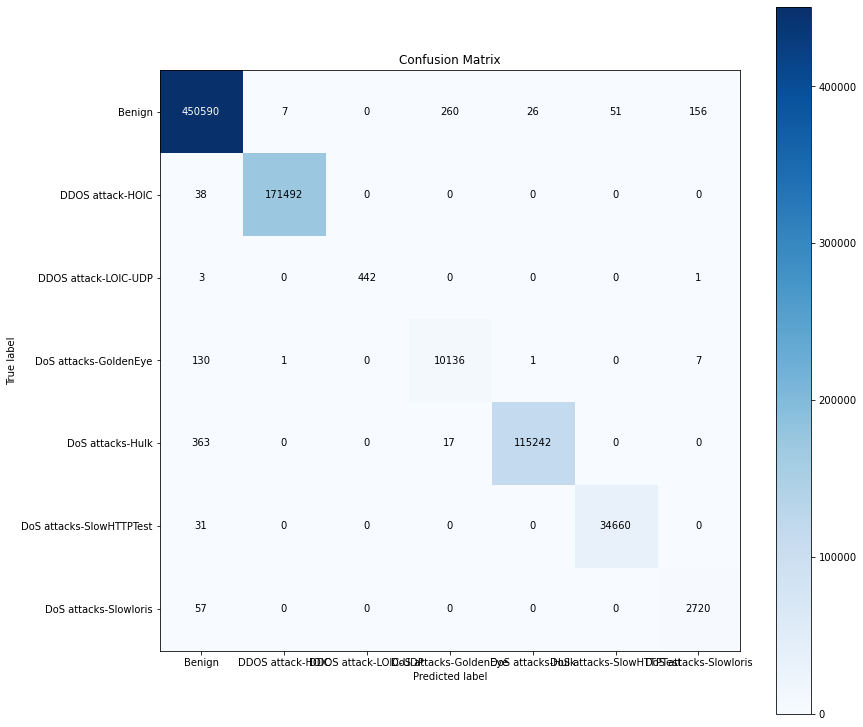

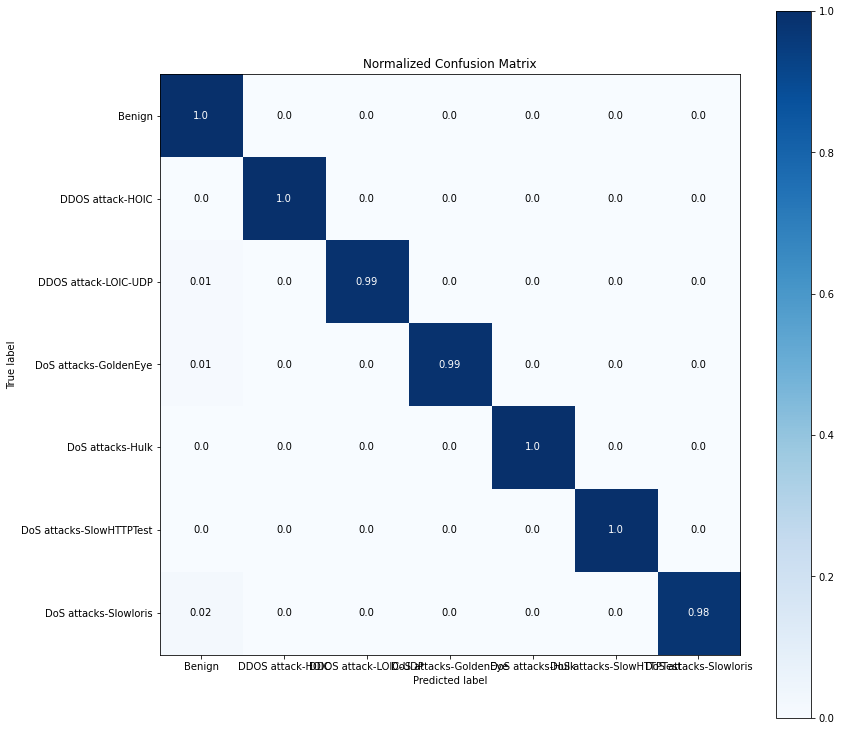

In [39]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, figsize= (13,13))
skplt.metrics.plot_confusion_matrix(y_test1_text, y_pred_text, normalize= True, figsize= (13,13))

## ROC

In [40]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test1, y_pred)
plt.plot(fpr_keras, tpr_keras, label='CNN + LSTM')
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

ValueError: multiclass format is not supported